In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris_data = sns.load_dataset('iris')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=iris_data, x='petal_length', hue='species', ax=axes[0], kde=True, palette='viridis')
axes[0].set_title('Rozkład długości płatków dla każdego gatunku iris')
axes[0].set_xlabel('Długość płatków')
axes[0].set_ylabel('Liczba')

sns.histplot(data=iris_data, x='petal_width', hue='species', ax=axes[1], kde=True, palette='viridis')
axes[1].set_title('Rozkład szerokości płatków dla każdego gatunku iris')
axes[1].set_xlabel('Szerokość płatków')
axes[1].set_ylabel('Liczba')

plt.tight_layout()
plt.show()


In [ ]:
import requests
import pandas as pd

url = "https://api.dane.gov.pl/media/resources/20221215/Wyniki_pomiar%C3%B3w_dot._monitoringu_chemizmu_gleb_ornych_Polski_w_2020_roku.csv"

response = requests.get(url)

if response.status_code == 200:
    with open("Wyniki_pomiarow_2020.csv", 'wb') as f:
        f.write(response.content)

    gleby = pd.read_csv("Wyniki_pomiarow_2020.csv")
    gleby=gleby.drop('Lp.',axis=1)
    print(gleby.head())
else:
    print("Błąd pobierania pliku.")


   Numer Punktu         Województwo        Gmina               Powiat  \
0             1  zachodniopomorskie      Siemyśl   Powiat kołobrzeski   
1             3  zachodniopomorskie      Karlino  Powiat białogardzki   
2             5  zachodniopomorskie  M. Koszalin   Powiat m. Koszalin   
3             7  zachodniopomorskie    Postomino    Powiat sławieński   
4             9           pomorskie  Trzebielino      Powiat bytowski   

  Szerokość geograficzna Długość geograficzna  Współrzędna WGS X  \
0             54° 4' 10"          15° 26' 58"          54.069444   
1             54° 2' 59"           15° 54' 0"          54.049722   
2            54° 12' 21"           16° 8' 44"          54.205833   
3            54° 27' 57"           16° 44' 1"          54.465833   
4            54° 15' 38"            17° 6' 3"          54.260556   

   Współrzędna WGS Y  piasek (1-0,1 mm) (%)  pył (0,1-0,02 mm) (%)  ...  \
0          15.449444                     67                     20  ...   
1 

In [ ]:
gleby.replace(' ', pd.NA, inplace=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

missing_val = gleby.isnull().sum()
missing_val2 = gleby.isnull().mean()
missing = pd.concat([missing_val, missing_val2], axis=1)
missing.columns = ['Liczba_brakujących', 'Procentowo']

print(missing)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


                                    Liczba_brakujących  Procentowo
Numer Punktu                                         0    0.000000
Województwo                                          0    0.000000
Gmina                                                0    0.000000
Powiat                                               0    0.000000
Szerokość geograficzna                               0    0.000000
Długość geograficzna                                 0    0.000000
Współrzędna WGS X                                    0    0.000000
Współrzędna WGS Y                                    0    0.000000
piasek (1-0,1 mm) (%)                                0    0.000000
pył (0,1-0,02 mm) (%)                                0    0.000000
części spławialne (< 0,02 mm) (%)                    0    0.000000
ił koloidalny (< 0,002 mm) (%)                       0    0.000000
piasek (2-0,05 mm) (%)                               0    0.000000
pył (0,05-0,002 mm) (%)                              0    0.00

In [ ]:
gleby.replace(pd.NA, 0, inplace=True)
display(gleby.head())

,Numer Punktu,Województwo,Gmina,Powiat,Szerokość geograficzna,Długość geograficzna,Współrzędna WGS X,Współrzędna WGS Y,"piasek (1-0,1 mm) (%)","pył (0,1-0,02 mm) (%)",...,Zn (mg/kg),Co (mg/kg),V (mg/kg),Li (mg/kg),Be (mg/kg),Ba (mg/kg),Sr (mg/kg),La (mg/kg),As (mg/kg),Hg (mg/kg)
0,1,zachodniopomorskie,Siemyśl,Powiat kołobrzeski,"54° 4' 10""","15° 26' 58""",54.069444,15.449444,67,20,...,21,1.45,8.69,0,0,14.8,0,5.33,1.72,0
1,3,zachodniopomorskie,Karlino,Powiat białogardzki,"54° 2' 59""","15° 54' 0""",54.049722,15.900000,61,30,...,29.7,1.6,9.01,0,0,22.9,0,6.32,2.35,0
2,5,zachodniopomorskie,M. Koszalin,Powiat m. Koszalin,"54° 12' 21""","16° 8' 44""",54.205833,16.145556,45,31,...,41.9,6.38,24.60,11.4,0,42.3,0,15.6,5.17,0
3,7,zachodniopomorskie,Postomino,Powiat sławieński,"54° 27' 57""","16° 44' 1""",54.465833,16.733611,38,35,...,31.2,3.55,20.60,0,0,27.1,0,9.9,3.64,0
4,9,pomorskie,Trzebielino,Powiat bytowski,"54° 15' 38""","17° 6' 3""",54.260556,17.100833,65,24,...,22.1,1.46,10.00,0,0,10.5,0,6.18,2.46,0


In [ ]:
missing_val = gleby.isnull().sum()
missing_val2 = gleby.isnull().mean()
missing = pd.concat([missing_val, missing_val2], axis=1)
missing.columns = ['Liczba_brakujących', 'Procent_brakujących']

print(missing)

                        Liczba_brakujących  Procent_brakujących
Numer Punktu                             0                  0.0
Województwo                              0                  0.0
Gmina                                    0                  0.0
Powiat                                   0                  0.0
Szerokość geograficzna                   0                  0.0
...                                    ...                  ...
Ba (mg/kg)                               0                  0.0
Sr (mg/kg)                               0                  0.0
La (mg/kg)                               0                  0.0
As (mg/kg)                               0                  0.0
Hg (mg/kg)                               0                  0.0

[81 rows x 2 columns]


In [ ]:
for column in gleby.columns:
    unique = gleby[column].unique()
    if len(unique) < 10:
        print('Liczba unikalnych etykiet zmiennej {}: {}'.format(column, len(unique)))

Liczba unikalnych etykiet zmiennej Na (cmol/kg): 7
Liczba unikalnych etykiet zmiennej fluoren (µg/kg): 2
Liczba unikalnych etykiet zmiennej dibenzo(a,h)antracen (µg/kg): 3
Liczba unikalnych etykiet zmiennej benzo(g,h,i)perylen (µg/kg): 1
Liczba unikalnych etykiet zmiennej Be (mg/kg): 1


In [ ]:
Na_tab = gleby[gleby['Na (cmol/kg)'] != 0][['Województwo', 'Gmina', 'Na (cmol/kg)']]

print(Na_tab)

        Województwo             Gmina Na (cmol/kg)
66      mazowieckie           Słubice         0.15
89     dolnośląskie        Krotoszyce          0.1
91         lubuskie           Górzyca         0.14
95     dolnośląskie           Ścinawa          0.1
97    wielkopolskie      Włoszakowice         0.11
99     dolnośląskie  Kąty Wrocławskie          0.1
143    dolnośląskie       Mysłakowice          0.1
179  świętokrzyskie           Dwikozy         0.16
193         śląskie            Mszana         0.16
195         śląskie          Pszczyna         0.46


In [ ]:
Fluorent_tab=gleby[gleby['fluoren (µg/kg)'] != 0][['Województwo', 'Gmina', 'fluoren (µg/kg)']]
print(Fluorent_tab)

    Województwo           Gmina fluoren (µg/kg)
75  mazowieckie  Małkinia Górna              31


In [ ]:
dib_antr_tab=gleby[gleby['dibenzo(a,h)antracen (µg/kg)'] != 0][['Województwo', 'Gmina', 'dibenzo(a,h)antracen (µg/kg)']]
print(dib_antr_tab)

            Województwo     Gmina dibenzo(a,h)antracen (µg/kg)
1    zachodniopomorskie   Karlino                           37
199         małopolskie  Wadowice                           42


In [ ]:
benz_per_tab=gleby[gleby['benzo(g,h,i)perylen (µg/kg)'] != 0][['Województwo', 'Gmina', 'benzo(g,h,i)perylen (µg/kg)']]
print(benz_per_tab)
be_tab=gleby[gleby['Be (mg/kg)'] != 0][['Województwo', 'Gmina', 'Be (mg/kg)']]
print(be_tab)

Empty DataFrame
Columns: [Województwo, Gmina, benzo(g,h,i)perylen (µg/kg)]
Index: []
Empty DataFrame
Columns: [Województwo, Gmina, Be (mg/kg)]
Index: []


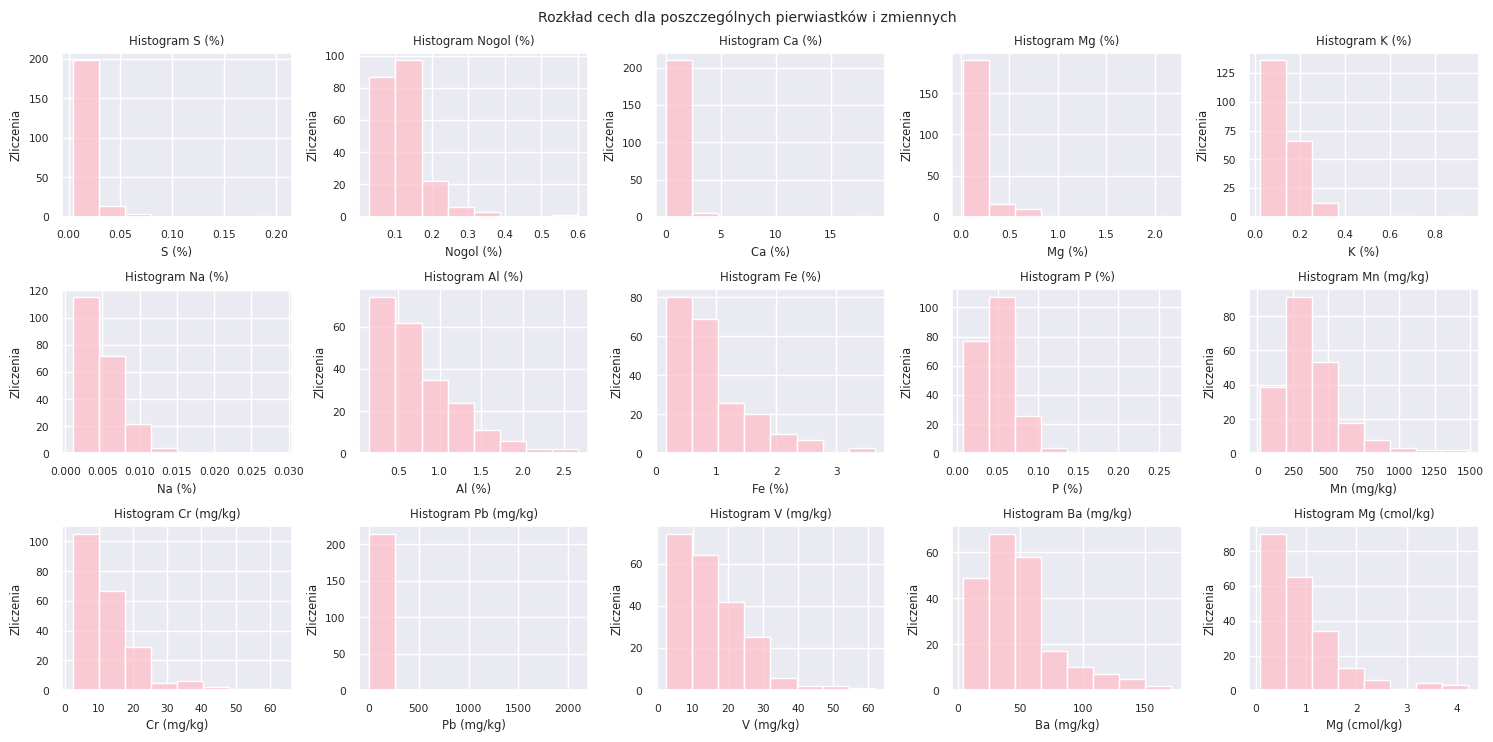

In [ ]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

bins= int(1+ 3.3*math.log10(len(gleby)))

fig, ax = plt.subplots(3,5, figsize=(15, 7.5))
for i in range(5):
  sns.histplot(x=gleby.iloc[:,i+56], ax=ax[0, i], bins = bins,color="pink")
  ax[0, i].set_title(f"Histogram {gleby.columns[i+56]}")
  ax[0, i].set_xlabel(f"{gleby.columns[i+56]}")
  ax[0, i].set_ylabel("Zliczenia")

for i in range(5):
  sns.histplot(x=gleby.iloc[:,i+61], ax=ax[1, i], bins = bins,color="pink")
  ax[1, i].set_title(f"Histogram {gleby.columns[i+61]}")
  ax[1, i].set_xlabel(f"{gleby.columns[i+61]}")
  ax[1, i].set_ylabel("Zliczenia")

columns= ['Cr (mg/kg)', 'Pb (mg/kg)', 'V (mg/kg)', 'Ba (mg/kg)', 'Mg (cmol/kg)']

for i,column in enumerate(columns):
    sns.histplot(gleby[column],ax=ax[2, i], bins=bins,color="pink")
    ax[2, i].set_title(f"Histogram {column}")
    ax[2, i].set_xlabel(column)
    ax[2, i].set_ylabel("Zliczenia")


fig.suptitle("Rozkład cech dla poszczególnych pierwiastków i zmiennych")
fig.tight_layout()

plt.savefig('wykresy.png')

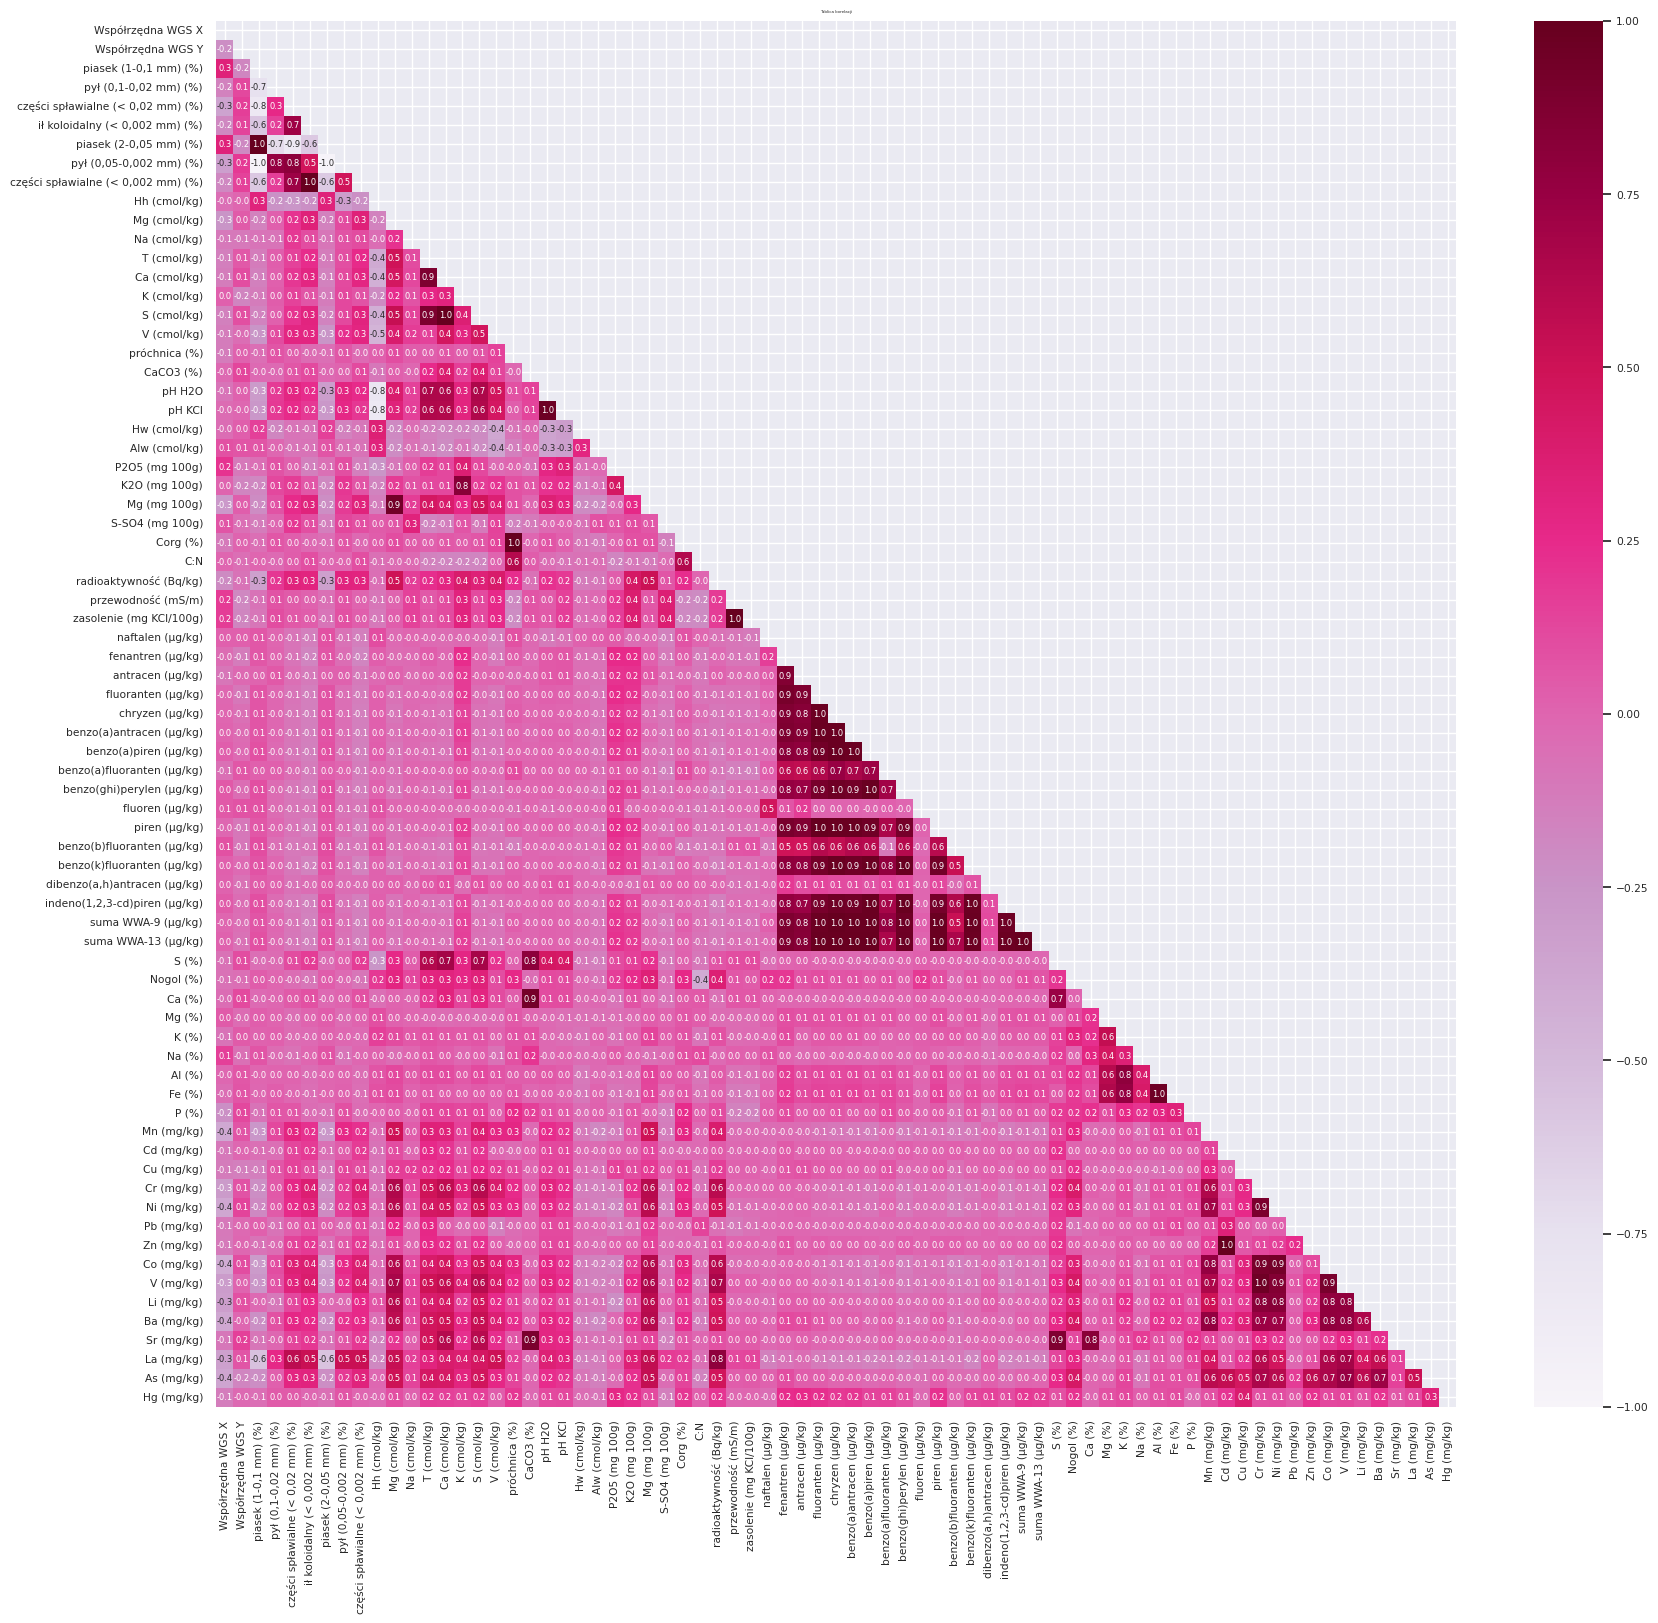

In [ ]:
to_delete = ['Numer Punktu', 'Województwo', 'Gmina', 'Powiat', 'Szerokość geograficzna', 'Długość geograficzna','benzo(g,h,i)perylen (µg/kg)', 'Be (mg/kg)']
gleby_filtred = gleby.drop(columns=to_delete)

plt.figure(figsize=(20, 18))
sns.set(font_scale=0.7)

korelacja = gleby_filtred.corr()
mask = np.triu(np.ones_like(korelacja, dtype=bool))

sns.heatmap(korelacja, mask=mask, cmap="PuRd",vmin=-1, vmax=1, annot=True, fmt=".1f",annot_kws={"size": 6})

plt.title('Tablica korelacji', fontsize=3)
plt.savefig('tablica_korelacji.png')
plt.show()


In [ ]:
        [('Mg (cmol/kg)', 'Mg (mg 100g)'),
         ('Ca (cmol/kg)', 'S (cmol/kg)'),
         ('próchnica (%)', 'Corg (%)'),
         ('CaCO3 (%)', 'Ca (%)'),
         ('pH H2O', 'pH KCl'),
         ('przewodność (mS/m)', 'zasolenie (mg KCl/100g)'),
         ('Al (%)', 'Fe (%)'),
         ('Cd (mg/kg)', 'Zn (mg/kg)'),
         ('Cr (mg/kg)', 'V (mg/kg)'),
         ('Ni (mg/kg)', 'Co (mg/kg)'),
         ('Co (mg/kg)', 'Cr (mg/kg)'),
         ('Co (mg/kg)', 'V (mg/kg)')]

[('Mg (cmol/kg)', 'Mg (mg 100g)'),
 ('Ca (cmol/kg)', 'S (cmol/kg)'),
 ('próchnica (%)', 'Corg (%)'),
 ('CaCO3 (%)', 'Ca (%)'),
 ('pH H2O', 'pH KCl'),
 ('przewodność (mS/m)', 'zasolenie (mg KCl/100g)'),
 ('Al (%)', 'Fe (%)'),
 ('Cd (mg/kg)', 'Zn (mg/kg)'),
 ('Cr (mg/kg)', 'V (mg/kg)'),
 ('Ni (mg/kg)', 'Co (mg/kg)'),
 ('Co (mg/kg)', 'Cr (mg/kg)'),
 ('Co (mg/kg)', 'V (mg/kg)')]

In [ ]:
print(gleby['Al (%)'].corr(gleby['Fe (%)']))

0.9572511715162155
